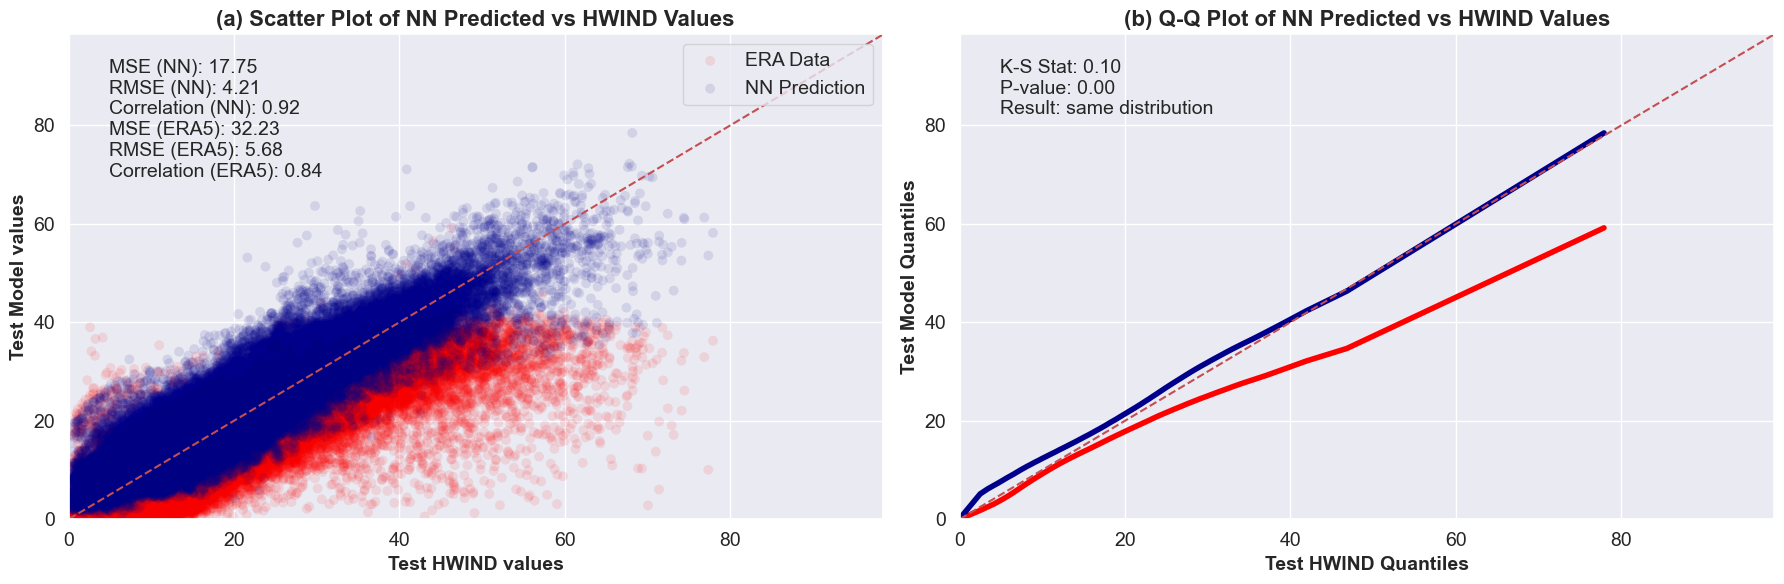

MSE (NN): 17.74515151977539
RMSE (NN): 4.212499618530273
Correlation (NN): 0.9159182115799338
MSE (ERA5): 32.22934746352118
RMSE (ERA5): 5.677089700147531
Correlation (ERA5): 0.8445411401686015


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Load the ensemble prediction vs. actual test data
test_predictions = np.load('')
y_test = np.load('')

# Flatten the arrays
test_predictions_flat = test_predictions.flatten()
y_test_flat = y_test.flatten()
interpolated_grid_new2 = np.array(interpolated_grid_new).flatten()

# Calculate metrics for NN predictions for all data
mse_nn = np.mean((y_test_flat - test_predictions_flat) ** 2)
rmse_nn = np.sqrt(mse_nn)
correlation_nn = np.corrcoef(y_test_flat, test_predictions_flat)[0, 1]

# Calculate metrics for interpolated data for all data
mse_interp = np.mean((y_test_flat - interpolated_grid_new2) ** 2)
rmse_interp = np.sqrt(mse_interp)
correlation_interp = np.corrcoef(y_test_flat, interpolated_grid_new2)[0, 1]

# Create the scatter plot
plt.figure(figsize=(18, 6))

# Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test_flat, interpolated_grid_new2, color='red', alpha=0.1, s=50, edgecolors='none', label='ERA Data')
plt.scatter(y_test_flat, test_predictions_flat, color='darkblue', alpha=0.1, s=50, edgecolors='none', label='NN Prediction')
plt.title('(a) Scatter Plot of NN Predicted vs HWIND Values', fontsize=16, fontweight='bold')
plt.xlabel('Test HWIND values', fontsize=14, fontweight='bold')
plt.ylabel('Test Model values', fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot([min(y_test_flat), max(y_test_flat)+40], [min(y_test_flat), max(y_test_flat)+40], 'r--')
plt.text(0.05, 0.95, f'MSE (NN): {mse_nn:.2f}\nRMSE (NN): {rmse_nn:.2f}\nCorrelation (NN): {correlation_nn:.2f}'
         f'\nMSE (ERA5): {mse_interp:.2f}\nRMSE (ERA5): {rmse_interp:.2f}\nCorrelation (ERA5): {correlation_interp:.2f}', 
         transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')
plt.xlim(0, max(y_test_flat.max(), test_predictions_flat.max()+20))
plt.ylim(0, max(y_test_flat.max(), test_predictions_flat.max()+20))
plt.legend(loc='upper right', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(y_test_quantiles, ersas, color='red', linewidth=4)
plt.plot(y_test_quantiles, predictions_quantiles, color='darkblue', linewidth=4)
plt.plot([min(y_test_quantiles), max(y_test_quantiles)+40], [min(y_test_quantiles), max(y_test_quantiles)+40], 'r--')


# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('scatter_ddpm.png', dpi=300, bbox_inches='tight')
plt.show()

# Display the metrics
print(f'MSE (NN): {mse_nn}')
print(f'RMSE (NN): {rmse_nn}')
print(f'Correlation (NN): {correlation_nn}')
print(f'MSE (ERA5): {mse_interp}')
print(f'RMSE (ERA5): {rmse_interp}')
print(f'Correlation (ERA5): {correlation_interp}')
